In [19]:
import numpy as np
import pandas as pd

# Define your local file paths
csv_file_path = r"C:\Users\annem\OneDrive - Stokman IT\EWEM\DTU2024-2025\thesis\efficiency of very large wind farms\test_block2_MS.csv"
output_csv = r"C:\Users\annem\OneDrive - Stokman IT\EWEM\DTU2024-2025\thesis\efficiency of very large wind farms\turbine_coordinates_india.csv"

# Load dataset
df = pd.read_csv(csv_file_path)

# Extract coordinate range
min_x, max_x = df["x"].min(), df["x"].max()
min_y, max_y = df["y"].min(), df["y"].max()

# Define expansion factor to place turbines AROUND the existing wind farm
expansion_factor = 0.05  # 5% larger boundary

# Compute expanded coordinate range
x_range = max_x - min_x
y_range = max_y - min_y

expanded_min_x = min_x - expansion_factor * x_range
expanded_max_x = max_x + expansion_factor * x_range
expanded_min_y = min_y - expansion_factor * y_range
expanded_max_y = max_y + expansion_factor * y_range

# Define grid size for 20 turbines
grid_size = 5  # 5x5 grid (max 25 turbines, we use 20)
num_turbines = 20

# Generate a square grid within the expanded coordinate range
x_coords, y_coords = np.meshgrid(
    np.linspace(expanded_min_x, expanded_max_x, grid_size),
    np.linspace(expanded_min_y, expanded_max_y, grid_size)
)

# Flatten and select only 20 turbine locations
turbine_x = x_coords.flatten()[:num_turbines]
turbine_y = y_coords.flatten()[:num_turbines]

# Create a DataFrame with new turbine locations
turbine_df = pd.DataFrame({"Turbine_ID": range(1, num_turbines + 1), "X": turbine_x, "Y": turbine_y})

# Save to your specified local path
turbine_df.to_csv(output_csv, index=False)

print(f"Turbine layout saved to: {output_csv}")


Turbine layout saved to: C:\Users\annem\OneDrive - Stokman IT\EWEM\DTU2024-2025\thesis\efficiency of very large wind farms\turbine_coordinates_india.csv


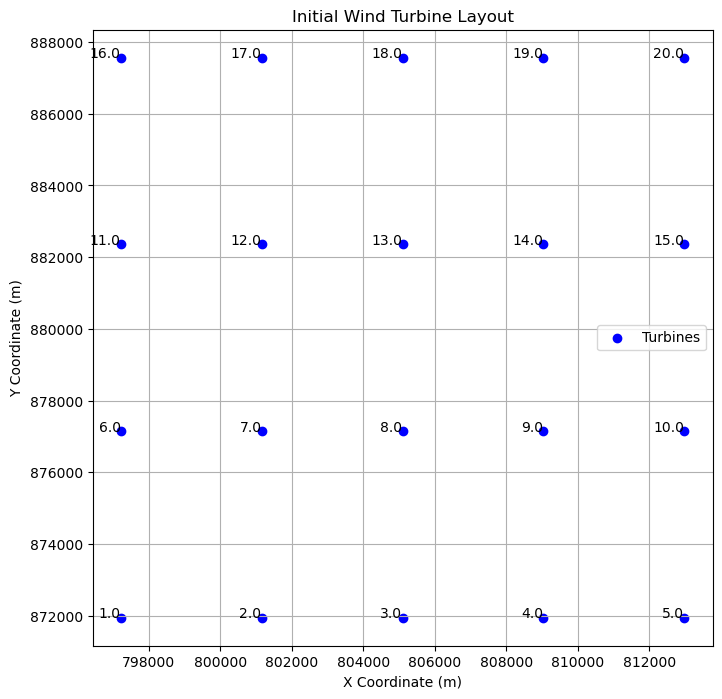

In [20]:
import matplotlib.pyplot as plt

# Plot the wind turbine layout
plt.figure(figsize=(8, 8))
plt.scatter(turbine_df["X"], turbine_df["Y"], marker="o", color="blue", label="Turbines")

# Annotate turbine IDs
for i, row in turbine_df.iterrows():
    plt.text(row["X"], row["Y"], str(row["Turbine_ID"]), fontsize=10, ha="right")

plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.title("Initial Wind Turbine Layout")
plt.legend()
plt.grid()
plt.show()



In [21]:
import numpy as np
import pandas as pd

# Define your local file paths
csv_file_path = r"C:\Users\annem\OneDrive - Stokman IT\EWEM\DTU2024-2025\thesis\efficiency of very large wind farms\test_block2_MS.csv"
output_csv = r"C:\Users\annem\OneDrive - Stokman IT\EWEM\DTU2024-2025\thesis\efficiency of very large wind farms\turbine_coordinates_rectangles.csv"

# Load dataset
df = pd.read_csv(csv_file_path)

# Extract coordinate range
min_x, max_x = df["x"].min(), df["x"].max()
min_y, max_y = df["y"].min(), df["y"].max()

# Define expansion factors to create a rectangular shape (longer than wide)
expansion_x = 0.2  # Extend the x-axis more to make it longer
expansion_y = 0.05  # Keep y-axis similar to previous

# Compute expanded coordinate range
x_range = max_x - min_x
y_range = max_y - min_y

rect_min_x = min_x - expansion_x * x_range
rect_max_x = max_x + expansion_x * x_range
rect_min_y = min_y - expansion_y * y_range
rect_max_y = max_y + expansion_y * y_range

# Define number of turbines per rectangle
num_turbines_per_farm = 20
total_farms = 3  # Three farms horizontally next to each other
spacing_between_farms = 1.2 * (rect_max_x - rect_min_x)  # Space farms apart

# Create storage lists
turbine_x, turbine_y, farm_ids, turbine_ids = [], [], [], []

# Generate turbines for each rectangular farm
turbine_id_counter = 1
for i in range(total_farms):
    # Offset x-coordinates for each farm
    #farm_offset_x = i * spacing_between_farms
    farm_offset_x = i * (spacing_between_farms + (rect_max_x - rect_min_x) / 5)

    
    # Generate grid for one rectangle
    x_coords, y_coords = np.meshgrid(
        np.linspace(rect_min_x + farm_offset_x, rect_max_x + farm_offset_x, 5),
        np.linspace(rect_min_y, rect_max_y, 4)
    )

    # Flatten and select only 20 turbines per farm
    x_flat = x_coords.flatten()[:num_turbines_per_farm]
    y_flat = y_coords.flatten()[:num_turbines_per_farm]

    # Store values
    turbine_x.extend(x_flat)
    turbine_y.extend(y_flat)
    farm_ids.extend([i + 1] * num_turbines_per_farm)  # Assign farm ID (1, 2, 3)
    turbine_ids.extend(range(turbine_id_counter, turbine_id_counter + num_turbines_per_farm))
    
    # Increment turbine counter
    turbine_id_counter += num_turbines_per_farm

# Create DataFrame
turbine_df = pd.DataFrame({
    "Turbine_ID": turbine_ids,
    "Farm_ID": farm_ids,
    "X": turbine_x,
    "Y": turbine_y
})

# Save to CSV
turbine_df.to_csv(output_csv, index=False)

print(f"Turbine layout saved to: {output_csv}")


Turbine layout saved to: C:\Users\annem\OneDrive - Stokman IT\EWEM\DTU2024-2025\thesis\efficiency of very large wind farms\turbine_coordinates_rectangles.csv


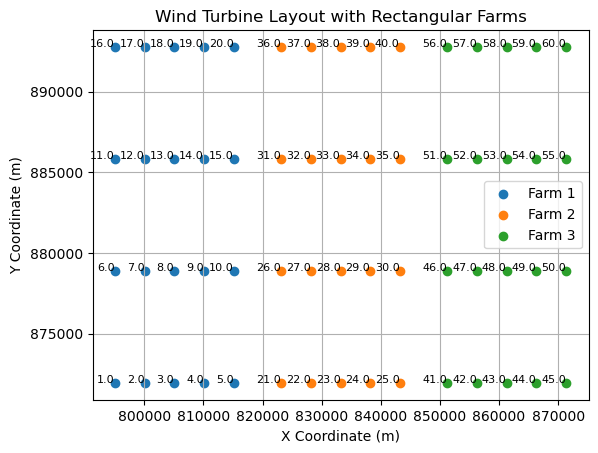

In [22]:
# plot the wind turbine layout to see the rectangular farms
import matplotlib.pyplot as plt

plt.Figure(figsize=(12, 6))
for farm_id in range(1, total_farms + 1):
    farm_df = turbine_df[turbine_df["Farm_ID"] == farm_id]
    plt.scatter(farm_df["X"], farm_df["Y"], label=f"Farm {farm_id}")
    for i, row in farm_df.iterrows():
        plt.text(row["X"], row["Y"], str(row["Turbine_ID"]), fontsize=8, ha="right")

plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.title("Wind Turbine Layout with Rectangular Farms")
plt.legend()
plt.grid()
plt.show()